## 1st Visualization: Climate Change in Germany

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.font_manager
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm
import math

%config InlineBackend.figure_format = 'retina'

In [113]:
df=pd.read_csv("data-5xKlg.csv")

In [114]:
df.head()

,year,time,Temp.<br>anomaly<br>(°C),Precipitation anomaly (%),label
0,2010,Autumn,-0.361667,17.461992,Autumn 2010
1,2011,Autumn,0.908333,-37.750055,Autumn 2011
2,2012,Autumn,0.388333,-8.234524,Autumn 2012
3,2013,Autumn,0.718333,27.282316,Autumn 2013
4,2014,Autumn,2.298333,-19.255110,Autumn 2014


In [115]:
df.rename(columns={'Temp.<br>anomaly<br>(°C)':'Temp','Precipitation anomaly (%)':'precipitation'},inplace=True)
df['season_values']=np.where(df['time']=='Spring', 1, (np.where(df['time']=='Summer',2,(np.where(df['time']=='Autumn',3,4)))))
df.sort_values(by=['year','season_values'],inplace=True)
df['positive_Temp'] = df['Temp'] > 0
df['positive_precip']=df['precipitation']>0

df.head()


,year,time,Temp,precipitation,label,season_values,positive_Temp,positive_precip
10,2010,Spring,0.109000,-5.152162,Spring 2010,1,True,False
21,2010,Summer,1.523000,22.145483,Summer 2010,2,True,True
0,2010,Autumn,-0.361667,17.461992,Autumn 2010,3,False,True
32,2010,Winter,-1.523000,-0.603243,Winter 2010,4,False,False
11,2011,Spring,2.459000,-51.849793,Spring 2011,1,True,False


In [116]:
df.shape

(43, 8)

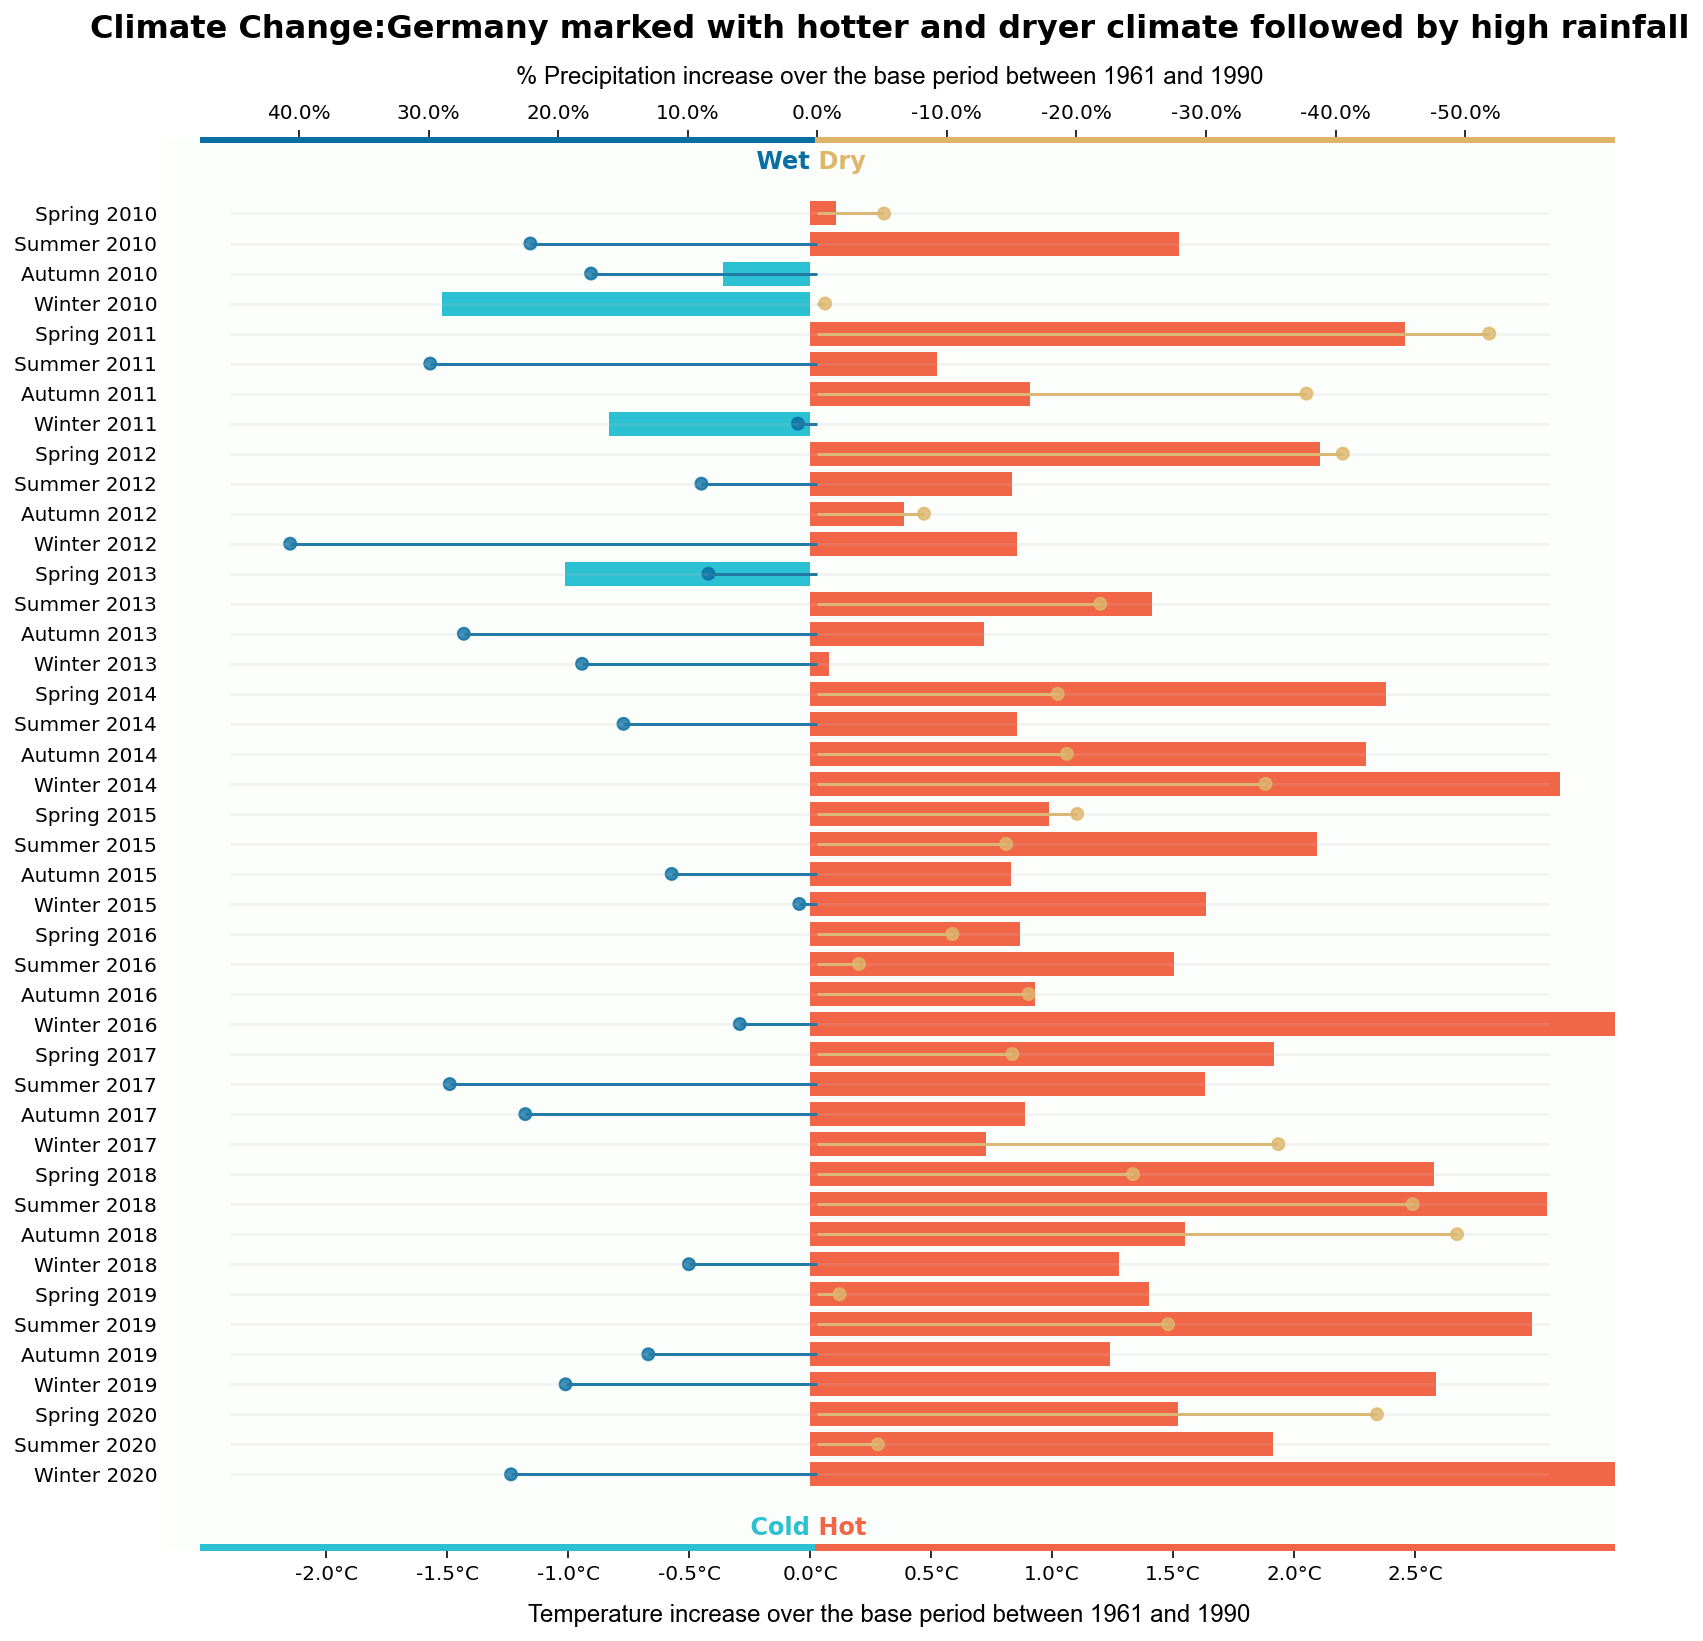

In [129]:
fig, ax = plt.subplots(figsize=(13,13))

cmap = ListedColormap(['#2CC0D3','#F26648'])
norm = BoundaryNorm([0], cmap.N)
dotcolors = cmap(norm(df['Temp']))
ax.barh(df["label"], df["Temp"], align='center',color=dotcolors)

ax1 = ax.twiny()

def align_xaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    x1, _ = ax1.transData.transform((v1, 0))
    x2, _ = ax2.transData.transform((v2, 0))
    inv = ax2.transData.inverted()
    dx, _ = inv.transform((0, 0)) - inv.transform((x1-x2, 0))
    minx, maxx = ax2.get_xlim()
    ax2.set_xlim(minx+dx, maxx+dx)

cmap2 = ListedColormap(['#dfb669','#096EA1'])
norm2 = BoundaryNorm([0], cmap2.N)
dotcolors2 = cmap2(norm2(df['precipitation']))

ax1.hlines(df.label, xmin=0, xmax=-1*df.precipitation/100,color=dotcolors2)
plt.scatter(-1*df.precipitation/100,df.label , c=dotcolors2, alpha=0.8)


x_min, x_max = ax1.get_xlim()
ax1.hlines(df.label, xmin=x_min, xmax=x_max,color='silver',alpha=0.15,ls='-')


align_xaxis(ax1, 0, ax, 0)    
ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(True)
ax1.get_xaxis().set_visible(True)
ax.tick_params(axis='y', which=u'both',length=0)

l=np.arange(-2,3,0.5)
ax.set_xticks(l)
m=np.arange(-0.4,0.6,0.1)
ax1.set_xticks(m)
ax.set_xticklabels(str(l[i])+"°C" for i in range(len(l)))
ax1.set_xticklabels(str(round(m[i],2)*-100)+"%" for i in range(len(m)))

a=mlines.Line2D([0,4], [44.5,44.5], color='#F26648',lw=5)
b=mlines.Line2D([-2.5,0], [44.5,44.5], color='#2CC0D3',lw=5)
c=mlines.Line2D([0,4], [-2.5,-2.5], color='#dfb669',lw=5)
d=mlines.Line2D([-2.5,0], [-2.5,-2.5], color='#096EA1',lw=5)
ax.add_line(a)
ax.add_line(b)
ax.add_line(c)
ax.add_line(d)

ax.text(0,44," Hot",fontweight='bold',fontsize=12,color='#F26648')
ax.text(0,44," Cold",fontweight='bold',fontsize=12,color='#2CC0D3',ha='right')
ax.text(0,-1.5," Dry",fontweight='bold',fontsize=12,color='#dfb669')
ax.text(0,-1.5," Wet",fontweight='bold',fontsize=12,color='#096EA1',ha='right')

ax.set_xlabel("Temperature increase over the base period between 1961 and 1990",fontsize=12,fontname='Arial')
ax.xaxis.labelpad = 10
ax1.set_xlabel("% Precipitation increase over the base period between 1961 and 1990",fontsize=12,fontname='Arial')
ax1.xaxis.labelpad = 10
ax.set_facecolor('#fbfefb')

plt.title("Climate Change:Germany marked with hotter and dryer climate followed by high rainfall",fontsize=16,loc='center',pad=14,fontweight='bold')
plt.show()

## 2nd Visualization: Flattening the COVID curve

In [118]:
import math

In [119]:
df_2=pd.read_csv("data-zLck8.csv")

In [120]:
df_2.head()

,days,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Venezuela,West Bank and Gaza,Yemen,Zambia,Zimbabwe,doubles every day,doubles every 2 days,doubles every 3 days,doubles every week,doubles every month
0,day 0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
1,day 1,11.857143,10.000000,11.428571,10.000000,13.714286,10.000000,11.285714,12.714286,10.571429,...,10.000000,11.714286,12.000000,10.285714,10.000000,20.0,14.142136,12.599210,11.040895,10.230475
2,day 2,13.428571,12.142857,13.571429,10.285714,16.714286,11.285714,12.714286,16.428571,11.285714,...,10.000000,13.142857,13.714286,10.428571,12.142857,40.0,20.000000,15.874011,12.190137,10.466262
3,day 3,15.000000,13.428571,15.571429,10.714286,19.571429,12.428571,14.142857,22.571429,12.142857,...,10.857143,14.857143,15.285714,10.571429,13.571429,80.0,28.284271,20.000000,13.459002,10.707483
4,day 4,16.428571,14.857143,17.857143,11.428571,23.428571,13.571429,15.857143,30.000000,12.857143,...,10.857143,17.000000,17.857143,10.714286,15.142857,160.0,40.000000,25.198421,14.859943,10.954263


### We will take median as the baseline

In [121]:
df_2["medianv"]=df_2.median(axis=1)
df_2.head()

,days,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,West Bank and Gaza,Yemen,Zambia,Zimbabwe,doubles every day,doubles every 2 days,doubles every 3 days,doubles every week,doubles every month,medianv
0,day 0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
1,day 1,11.857143,10.000000,11.428571,10.000000,13.714286,10.000000,11.285714,12.714286,10.571429,...,11.714286,12.000000,10.285714,10.000000,20.0,14.142136,12.599210,11.040895,10.230475,11.428571
2,day 2,13.428571,12.142857,13.571429,10.285714,16.714286,11.285714,12.714286,16.428571,11.285714,...,13.142857,13.714286,10.428571,12.142857,40.0,20.000000,15.874011,12.190137,10.466262,13.285714
3,day 3,15.000000,13.428571,15.571429,10.714286,19.571429,12.428571,14.142857,22.571429,12.142857,...,14.857143,15.285714,10.571429,13.571429,80.0,28.284271,20.000000,13.459002,10.707483,15.214286
4,day 4,16.428571,14.857143,17.857143,11.428571,23.428571,13.571429,15.857143,30.000000,12.857143,...,17.000000,17.857143,10.714286,15.142857,160.0,40.000000,25.198421,14.859943,10.954263,17.428571


In [122]:
df_2.columns

Index(['days', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe',
       'doubles every day', 'doubles every 2 days', 'doubles every 3 days',
       'doubles every week', 'doubles every month', 'medianv'],
      dtype='object', length=123)

### Let's enrich the data and calculate data points to identify deaths doubling every 10 days and double every 20 days


In [123]:
df_2.head()

,days,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,West Bank and Gaza,Yemen,Zambia,Zimbabwe,doubles every day,doubles every 2 days,doubles every 3 days,doubles every week,doubles every month,medianv
0,day 0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
1,day 1,11.857143,10.000000,11.428571,10.000000,13.714286,10.000000,11.285714,12.714286,10.571429,...,11.714286,12.000000,10.285714,10.000000,20.0,14.142136,12.599210,11.040895,10.230475,11.428571
2,day 2,13.428571,12.142857,13.571429,10.285714,16.714286,11.285714,12.714286,16.428571,11.285714,...,13.142857,13.714286,10.428571,12.142857,40.0,20.000000,15.874011,12.190137,10.466262,13.285714
3,day 3,15.000000,13.428571,15.571429,10.714286,19.571429,12.428571,14.142857,22.571429,12.142857,...,14.857143,15.285714,10.571429,13.571429,80.0,28.284271,20.000000,13.459002,10.707483,15.214286
4,day 4,16.428571,14.857143,17.857143,11.428571,23.428571,13.571429,15.857143,30.000000,12.857143,...,17.000000,17.857143,10.714286,15.142857,160.0,40.000000,25.198421,14.859943,10.954263,17.428571


### We derive the formula to calulate the doubling rate which is: log(2)/log(1+r) where r is the growth rate

In [124]:
def doublerate(y,df_2,str):
    c=[]
    c.append(0)
    for i in range(1,len(df_2)):
        if(y[i]/y[i-1]>1):
            slope=math.floor(np.log(2)/np.log(y[i]/y[i-1]))
        else:
            slope=50
        if(slope<=1):
            c.append(1)
        elif(slope<=2):
            c.append(2)
        elif(y[i]<=3):
            c.append(3)
        elif(y[i]<=7):
            c.append(4)
        elif(y[i]<=10):
            c.append(5)
        elif(y[i]<=20):
            c.append(6)
        else:
            c.append(7)
    df_2.insert(1,str,c)
    

doublerate(df_2["US"],df_2,"US_dr")
doublerate(df_2["Europe"],df_2,"Europe_dr")
doublerate(df_2["China"],df_2,"China_dr")
doublerate(df_2["Italy"],df_2,"Italy_dr")
doublerate(df_2["medianv"],df_2,"medianv_dr")
doublerate(df_2["South Korea"],df_2,"SKorea_dr")

In [125]:
df_2.head()

,days,SKorea_dr,medianv_dr,Italy_dr,China_dr,Europe_dr,US_dr,Afghanistan,Albania,Algeria,...,West Bank and Gaza,Yemen,Zambia,Zimbabwe,doubles every day,doubles every 2 days,doubles every 3 days,doubles every week,doubles every month,medianv
0,day 0,0,0,0,0,0,0,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
1,day 1,6,6,1,7,6,6,11.857143,10.000000,11.428571,...,11.714286,12.000000,10.285714,10.000000,20.0,14.142136,12.599210,11.040895,10.230475,11.428571
2,day 2,6,6,2,7,2,6,13.428571,12.142857,13.571429,...,13.142857,13.714286,10.428571,12.142857,40.0,20.000000,15.874011,12.190137,10.466262,13.285714
3,day 3,6,6,2,7,2,6,15.000000,13.428571,15.571429,...,14.857143,15.285714,10.571429,13.571429,80.0,28.284271,20.000000,13.459002,10.707483,15.214286
4,day 4,6,6,2,7,2,7,16.428571,14.857143,17.857143,...,17.000000,17.857143,10.714286,15.142857,160.0,40.000000,25.198421,14.859943,10.954263,17.428571


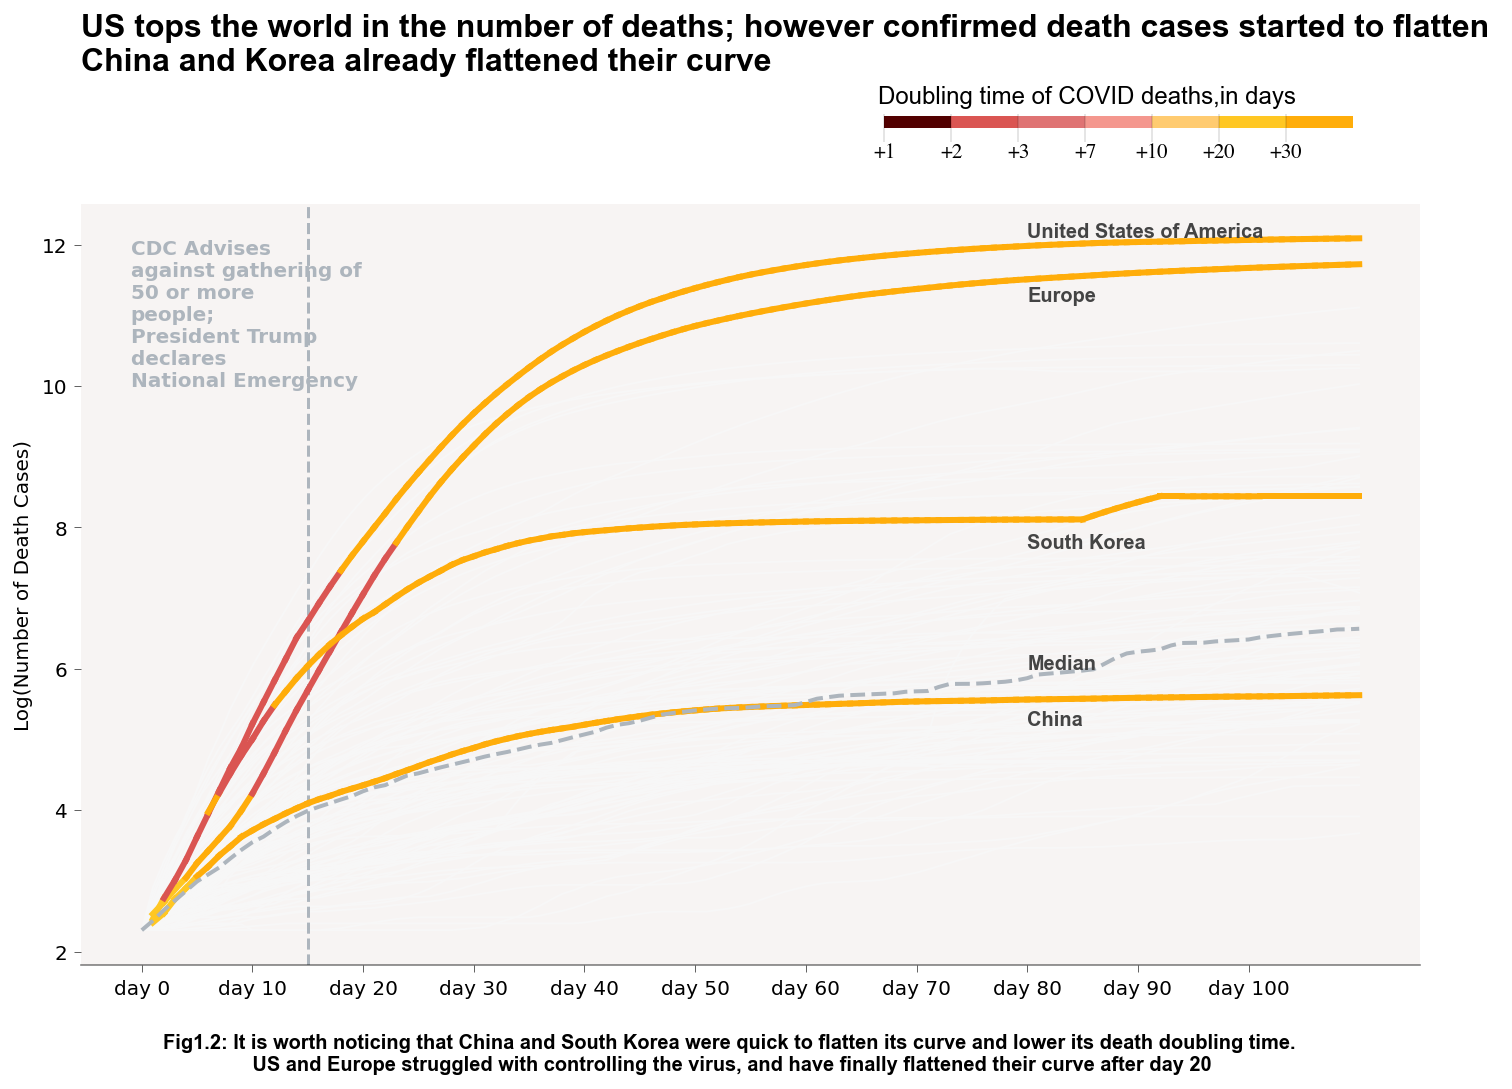

In [127]:
fig, ax = plt.subplots(figsize=(12,7))

cmap = ListedColormap(['#520000','#da5552','#df7373','#f4978e','#ffcb70','#ffc723','#ffad0a'])
norm = BoundaryNorm([1,2,3,4,5,6,7,8], cmap.N)
#cmap(norm(df['precipitation']))


def covid_lines(x,y,z):
    for i in range(1,len(y)):
        if(z[i]==1):
             plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#cc444b',lw=3)
        if(z[i]==2):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#da5552',lw=3)
        if(z[i]==3):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#df7373',lw=3)
        if(z[i]==4):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#f4978e',lw=3)
        if(z[i]==5):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#ffcb70',lw=3)
        if(z[i]==6):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#ffc723',lw=3)
        if(z[i]==7):
            plt.plot(x[i:i+2], np.log(y)[i:i+2],c='#ffad0a',lw=3)
        


#covid_lines(df_2.days,df_2.medianv,df_2.medianv_dr)

#Plotting the other lines
for i in range(7,123):
    plt.plot(df_2.days,np.log(df_2.iloc[:, i]),c='#F7F7F7',lw=1)


ax.axvline(x=15,linewidth=1.5, color='#adb5bd',ls='--')   
    
covid_lines(df_2.days,df_2.US,df_2.US_dr)
covid_lines(df_2.days,df_2.Europe,df_2.Europe_dr)
covid_lines(df_2.days,df_2.China,df_2.China_dr)
covid_lines(df_2.days,df_2["South Korea"],df_2.SKorea_dr)
l1=plt.plot(df_2.days,np.log(df_2.medianv),c='#adb5bd',lw=2,ls='--',label='median')



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().spines["bottom"].set_alpha(.5)

#ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Log(Number of Death Cases)")
ax.get_yaxis().set_visible(True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
axins1 = ax.inset_axes([0.60, 1.1, 0.35, 0.015])
cbar=fig.colorbar(sm, cax=axins1, orientation="horizontal",ticks=[1,2,3,4,5,6,7])
cbar.ax.set_xticklabels([ '+1', '+2','+3','+7','+10','+20','+30'],fontsize=10.5,fontname="Times")
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='inout',length=14,width=0.1,bottom=1,top=0,pad=0.30)

#Adding text in graph
ax.text(66.5,14,"Doubling time of COVID deaths,in days",fontname="Arial",fontsize=12)
ax.text(80,12.1,"United States of America",fontname="Arial",fontsize=10,fontweight='bold',color='#444444')
ax.text(80,11.2,"Europe",fontname="Arial",fontsize=10,fontweight='bold',color='#444444')
ax.text(80,7.7,"South Korea",fontname="Arial",fontsize=10,fontweight='bold',color='#444444')
ax.text(80,6.0,"Median",fontname="Arial",fontsize=10,fontweight='bold',color='#444444')
ax.text(80,5.2,"China",fontname="Arial",fontsize=10,fontweight='bold',color='#444444')
ax.text(-1,10,"CDC Advises \nagainst gathering of \n50 or more \npeople;\nPresident Trump \ndeclares \nNational Emergency",color='#adb5bd',fontweight='bold')


#Playing with Ticks
m=np.arange(0,110,10)
ax.set_xticks(m)
ax.tick_params(width=0.3)
ax.set_facecolor('#f7f4f3')

plt.title("US tops the world in the number of deaths; however confirmed death cases started to flatten \nChina and Korea already flattened their curve",fontsize=16,loc='left',pad=23,fontweight='bold',fontname='Arial')
fig.text(.5, .02, "Fig1.2: It is worth noticing that China and South Korea were quick to flatten its curve and lower its death doubling time.\n US and Europe struggled with controlling the virus, and have finally flattened their curve after day 20", ha='center',fontname='Arial',fontweight='bold')


plt.show()

## Visualization 3:

In [5]:
df_3=pd.read_csv("Data.csv")
df_3.head(10)
#Removing NAs if present
df_3.dropna()

,Industry,Profit,Tax,Effective corporate federal income tax rates (2018),Industry1,Profit (in millions)_ tooltips,Tax (in millions)_tooltips,Tax2
0,3M,3378000000,601000000,17.8,Miscellaneous manufacturing,"3,378",601,601000000
1,ABM Industries,87500000,-200000,-0.2,Miscellaneous services,87.5,-0.2,-200000
2,Activision Blizzard,447000000,-243000000,-54.4,"Computers, office equip, software, data",447,-243,-243000000
3,AECOM Technology,243600000,-186400000,-76.5,Engineering & construction,243.6,-186.4,-186400000
4,Agilent Technologies,168000000,21000000,12.5,Metals & metal products,168,21,21000000
...,...,...,...,...,...,...,...,...
374,Xcel Energy,1434000000,-34000000,-2.4,"Utilities, gas and electric","1,434",-34,-34000000
375,Xerox,341400000,15000000,4.4,"Computers, office equip, software, data",341.4,15,15000000
376,XPO Logistics,313000000,2000000,0.6,Transportation,313,2,2000000
377,Yum Brands,701000000,31000000,4.4,Miscellaneous services,701,31,31000000


#### Finding the Tax owed by the company

In [6]:
df_3["Tax_owed"]=(0.21*df_3["Profit"]-df_3["Tax2"])
#Removing NAs if present
df_3.dropna()

,Industry,Profit,Tax,Effective corporate federal income tax rates (2018),Industry1,Profit (in millions)_ tooltips,Tax (in millions)_tooltips,Tax2,Tax_owed
0,3M,3378000000,601000000,17.8,Miscellaneous manufacturing,"3,378",601,601000000,108380000.0
1,ABM Industries,87500000,-200000,-0.2,Miscellaneous services,87.5,-0.2,-200000,18575000.0
2,Activision Blizzard,447000000,-243000000,-54.4,"Computers, office equip, software, data",447,-243,-243000000,336870000.0
3,AECOM Technology,243600000,-186400000,-76.5,Engineering & construction,243.6,-186.4,-186400000,237556000.0
4,Agilent Technologies,168000000,21000000,12.5,Metals & metal products,168,21,21000000,14280000.0
...,...,...,...,...,...,...,...,...,...
374,Xcel Energy,1434000000,-34000000,-2.4,"Utilities, gas and electric","1,434",-34,-34000000,335140000.0
375,Xerox,341400000,15000000,4.4,"Computers, office equip, software, data",341.4,15,15000000,56694000.0
376,XPO Logistics,313000000,2000000,0.6,Transportation,313,2,2000000,63730000.0
377,Yum Brands,701000000,31000000,4.4,Miscellaneous services,701,31,31000000,116210000.0


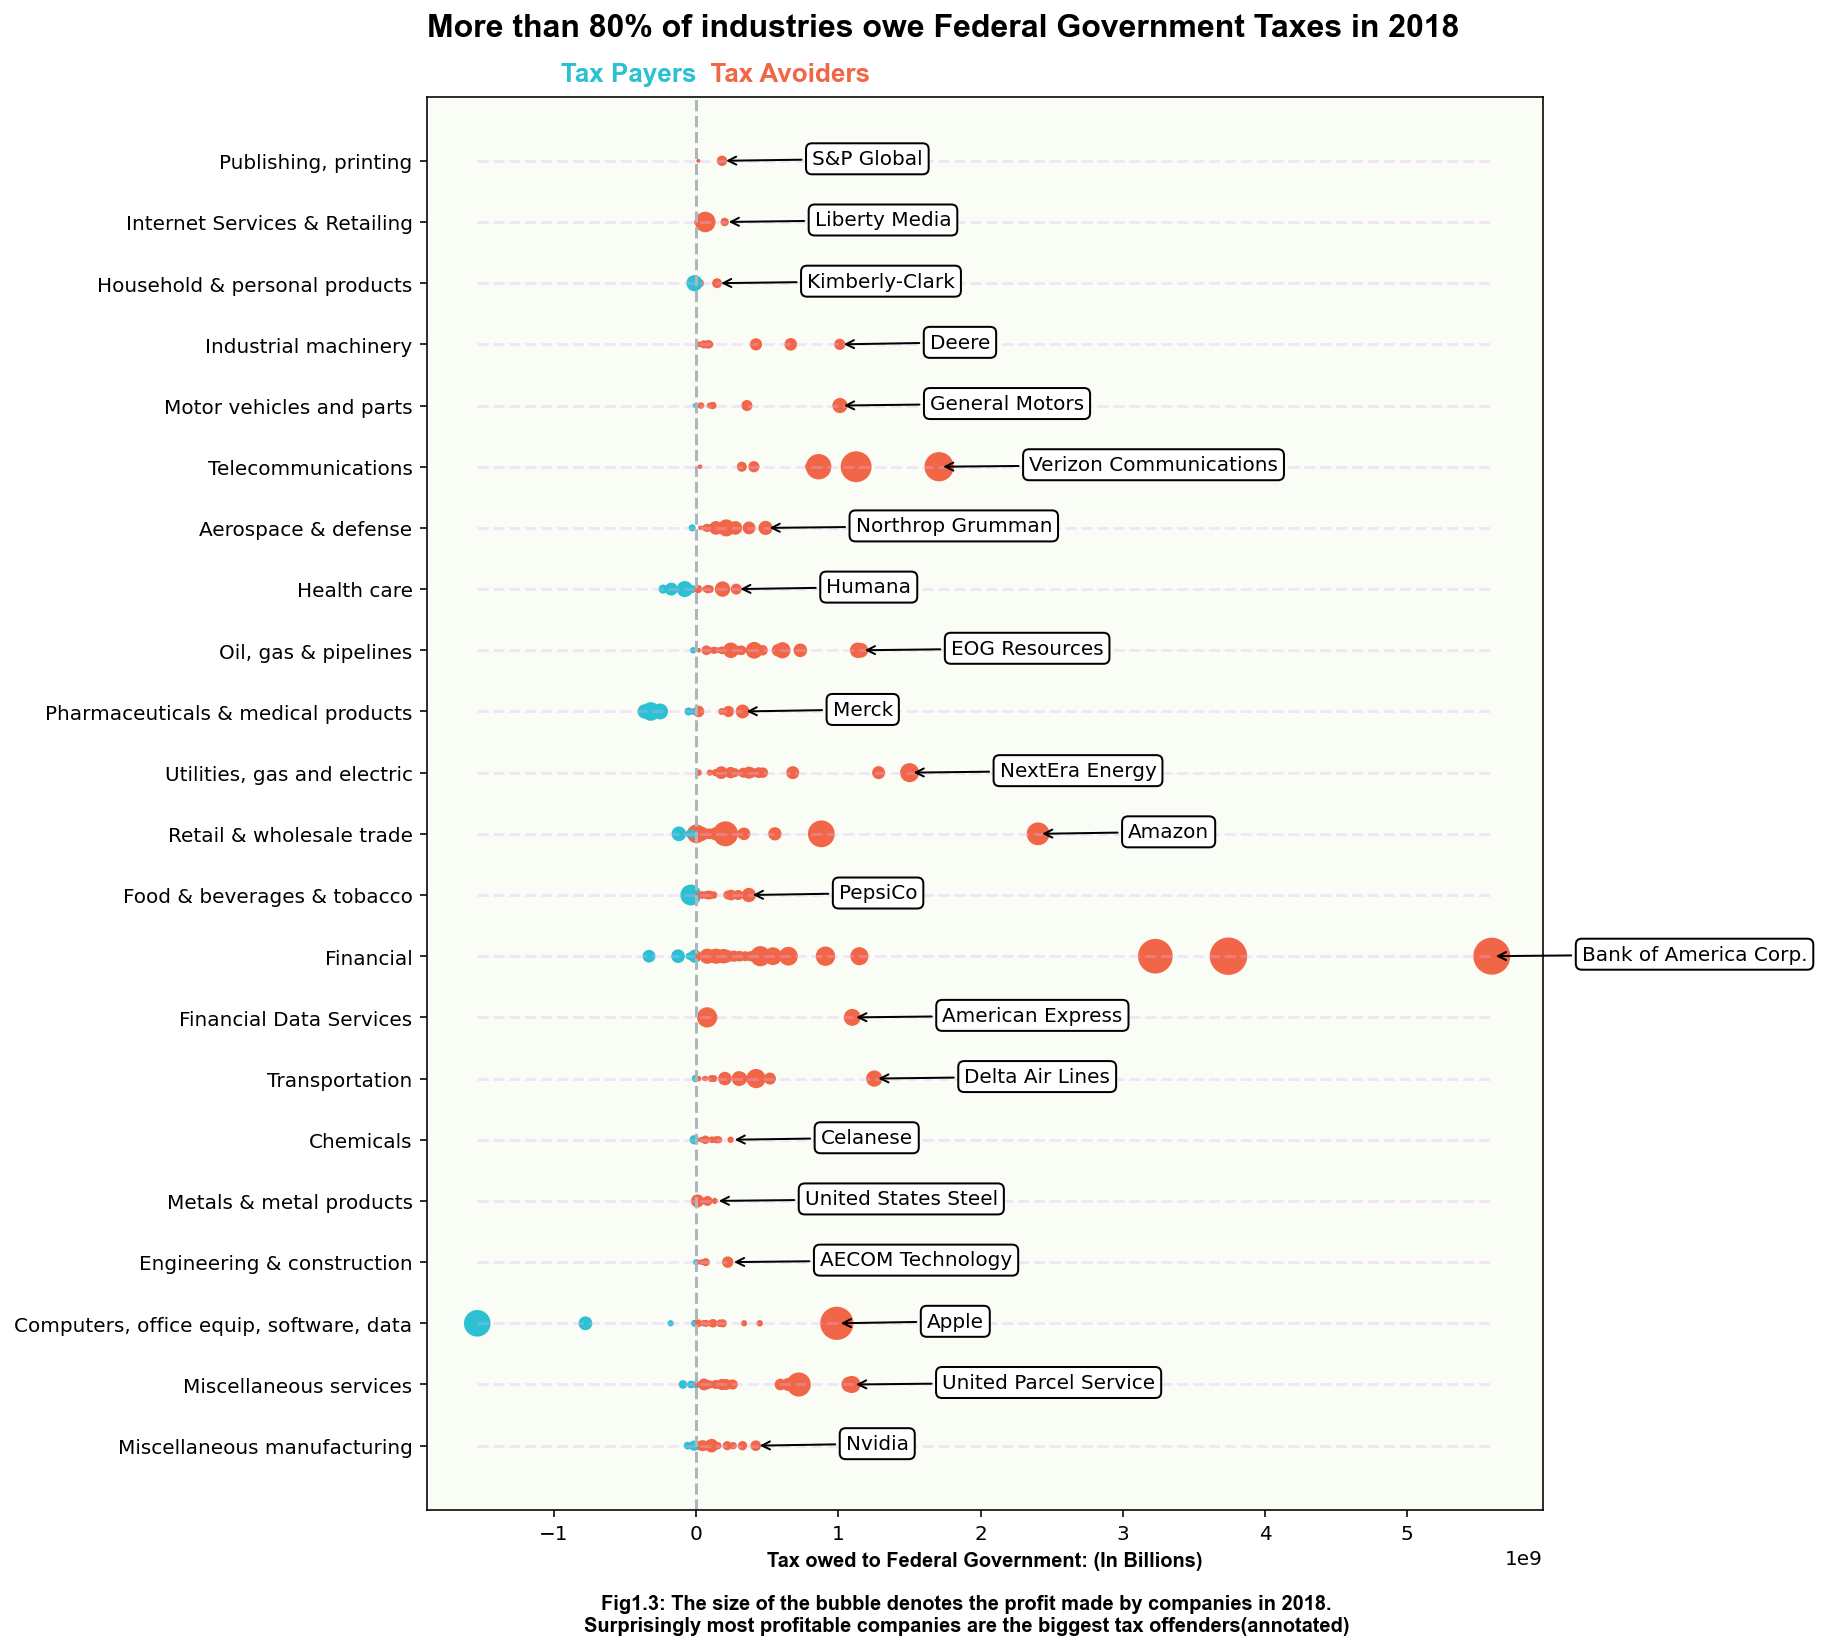

In [130]:
fig, ax = plt.subplots(figsize=(10,13))
x_min=min(df_3.Tax_owed)
x_max=max(df_3.Tax_owed)
cmap = ListedColormap(['#2CC0D3','#F26648'])
norm = BoundaryNorm([0], cmap.N)
dotcolors = cmap(norm(df_3['Tax_owed']))
t = np.arange(0.0, len(df_3.Industry1.unique()), 1)
ax.hlines(t, xmin=x_min, xmax=x_max,color='#e2afff',alpha=0.3,ls='--')
plt.scatter(df_3.Tax_owed,df_3.Industry1,s=df_3.Profit/100000000,c=dotcolors)

idx = df_3.groupby(["Industry1"])['Tax_owed'].transform(max) == df_3['Tax_owed']
df_max=df_3[idx]
df_max
for i in range(df_max.shape[0]):
    plt.annotate(df_max.Industry.tolist()[i],xy= (df_max.Tax_owed.tolist()[i]+0.2, df_max.Industry1.tolist()[i]),xycoords="data",xytext=(45, 1), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
ax.text(-1,22.3,"Tax Payers",ha='right',color='#2CC0D3',fontweight='bold',fontname='Arial',fontsize=13)
ax.text(-1,22.3,"  Tax Avoiders",ha='left',color='#F26648',fontweight='bold',fontname='Arial',fontsize=13)
ax.axvline(x=0,linewidth=1.5, color='#adb5bd',ls='--')   
ax.set_xlabel("Tax owed to Federal Government: (In Billions)",fontweight='bold',fontname='Arial',fontsize=10)

ax.set_facecolor('#fafdf6')
plt.title("More than 80% of industries owe Federal Government Taxes in 2018",loc='left',ha='left',pad=30,fontweight='bold',fontname='Arial',fontsize=16)
fig.text(.5, 0.06, "Fig1.3: The size of the bubble denotes the profit made by companies in 2018.\nSurprisingly most profitable companies are the biggest tax offenders(annotated)", ha='center',fontname='Arial',fontweight='bold')

plt.show()